In [7]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import json
from os.path import join

In [8]:
dataset_name = 'dd'

seed = '1860'
folder = f'../results/{dataset_name}/analysis_refused'

is_test = False
is_all = True

ext = ''
if is_test:
    ext = '_test'
if is_all:
    ext = '_all'

graph_stats = {}
levels_reduction = ['100', '50', '25_freeze']
for lvl in levels_reduction:
    filename = join(folder,
                f'{lvl}{ext}',
                seed,
                'graph_stats.json')
    lvl = lvl.split('_')[0]
    with open(filename, 'r') as file:
        graph_stats[lvl] = json.load(file)

In [9]:
from tabulate import tabulate

def compute_stats(values: list) -> str:
    mean = f'{np.mean(values):.2f}±{np.std(values):<5.2f}'
    median = f'{np.median(values):.2f}'
    min_max = f'{np.min(values):.2f}-{np.max(values):.2f}'
    
    return f'{mean} | {median} | {min_max}'

def print_statistics(stats, prop, name):
    
    data = [[prop] + [compute_stats(values[prop]) for key, values in stats.items()]]
    
    return data

In [16]:
props = [[k for k in gr_st.keys()] for gr_st in graph_stats.values()][0]


data = [[""] + levels_reduction]
data += [[''] + [f'mean | median | min-max'] * len(graph_stats)]
for prop in props:
    data += print_statistics(graph_stats, prop, prop)


filename = join(folder,
                f'analysis_{"test" if is_test else "train"}_graph.txt')

tab = tabulate(data, headers='firstrow', tablefmt='fancy_grid')
with open(filename, 'w') as file:
    file.write(tab)



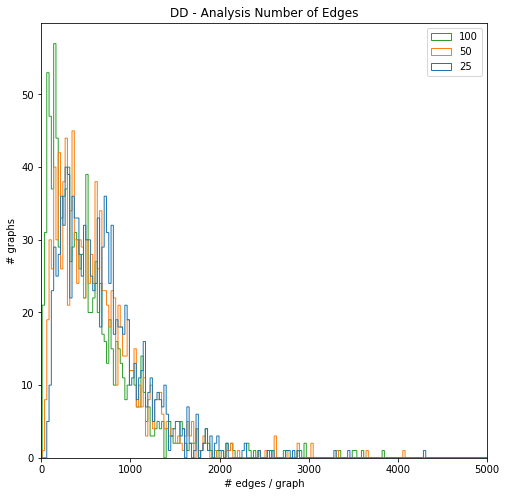

In [17]:
def plot_bar(stats, prop, title, filename, xlabel='--'):

    n_plots = len(stats)
    fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(8, 8))
    vals = []
    keys = []
    for key, stat_lvl in stats.items():
        values = stat_lvl[prop]
        vals.append(values)
        keys.append(key)

        

    ax.hist(vals,
            bins=len(vals[0])//2, # range(max(values)//2))
            histtype='step',
            # alpha=0.6,
           )
    ax.legend(keys)

    ax.set(
        title=f'{title}',
        xlabel=xlabel,
        ylabel='# graphs'
    )
    # ax.autoscale(tight=True)
    plt.xlim(-5, 5000)
    # plt.ylim(0, 60)
    # plt.show()
    plt.savefig(filename)
    

plot_bar(graph_stats,
         prop='n_edges',
         title=f'{dataset_name.upper()} - Analysis Number of Edges',
         filename=join(folder, f'n_edges_{"test" if is_test else "train"}_graphs.png'),
         xlabel='# edges / graph')

In [18]:
# levels_reduction = ['100', '50', '25_freeze']
# graph_stats = {}
# for lvl in levels_reduction:
#     filename = join(folder,
#                 f'{lvl}{"_test" if is_test else ""}',
#                 seed,
#                 'graph_stats.json')

#     with open(filename, 'r') as file:
#         graph_stats[lvl] = json.load(file)

/home/anthonygillioz/Documents/graph_matching/venv/lib/python3.9/site-packages/brokenaxes.py:154: UserWarning: Attempting to set identical left == right == 12 results in singular transformations; automatically expanding.
  ax.set_xlim(xlims[i % ncols])


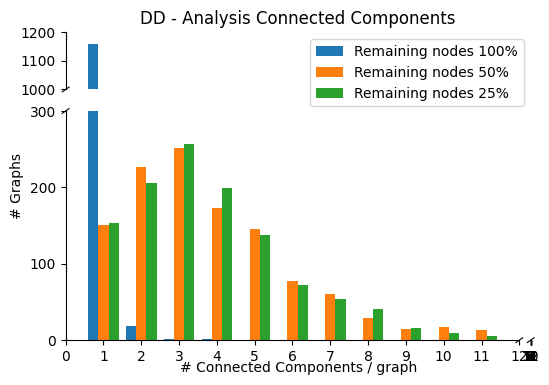

In [92]:
from brokenaxes import brokenaxes

def plot_grouped_bar(stats, prop, title, xlim, filename, xlabel='--'):

    n_bars = len(stats)
    fig = plt.figure(figsize=(6, 4))
    bax = brokenaxes(xlims=(xlim, (12, 12)), ylims=((0, 300),(1000, 1200)), d=0.007, tilt=35, hspace=0.15, height_ratios=[0.2, 0.8], wspace=0.05)
    # fig, (ax, ax2) = plt.subplots(2, 1, sharex=True) #, figsize=(12, 8))
    # fig.subplots_adjust(hspace=0.15)
    
    vals = []
    max_ = 0
    for key, stat_lvl in stats.items():
        values = stat_lvl[prop]

        counts = np.bincount(values)

        vals.append(counts)
        max_ = max(max_, max(values))
        
    width = 0.27

    x = np.arange(0, xlim[1]) #max_+1)

    bax.bar(
        x - width,
        np.concatenate([vals[0], np.zeros(max_ - len(vals[0]) + 1)])[:xlim[1]],
        width=width,
        label='Remaining nodes 100%',
          )
    bax.bar(
        x ,
        np.concatenate([vals[1], np.zeros(max_ - len(vals[1]) + 1)])[:xlim[1]],
        width=width,
        label='Remaining nodes 50%',
          )
    bax.bar(
        x + width,
        np.concatenate([vals[-1], np.zeros(max_ - len(vals[-1]) + 1)])[:xlim[1]],

        width=width,
        label='Remaining nodes 25%',
          )

    bax.set_title(title)
    bax.set_xlabel(xlabel)
    bax.set_ylabel('# Graphs')
    # print(bax.axs[0].set_xticks(1, xlim[1]))
    bax.legend()
    bax.set(
        xticks=range(1, 11),

        # xlabel=xlabel,
        # ylabel='# graphs'
    )
    # bax.xlim(xlim)
    # plt.xlim(xlim)
    
    plt.savefig(filename, transparent=True)
# plt.style.use('grayscale')
plt.style.use('default')
# Connected Components
plot_grouped_bar(graph_stats,
                 prop='n_connected_components',
                 title=f'{dataset_name.upper()} - Analysis Connected Components',
                 xlim=(0, 12),
                 filename=join(folder, f'n_connected_components_{ext}_graphs.png'),
                 xlabel='# Connected Components / graph')

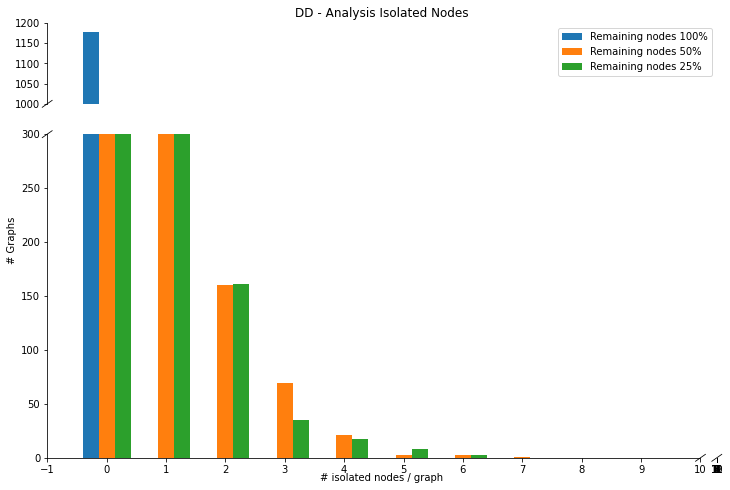

In [78]:
# Isolated nodes
plot_grouped_bar(graph_stats,
                 prop='n_isolated_nodes',
                 title=f'{dataset_name.upper()} - Analysis Isolated Nodes',
                 xlim=(-1, 8),
                 filename=join(folder, f'n_isolated_nodes_{ext}_graphs.png'),
                 xlabel='# isolated nodes / graph')

In [9]:
# plot_bar(graph_stats['n_nodes'],
#          title=f'{dataset_name.upper()} - Analysis Number of Nodes',
#          xlabel='# nodes / graph')

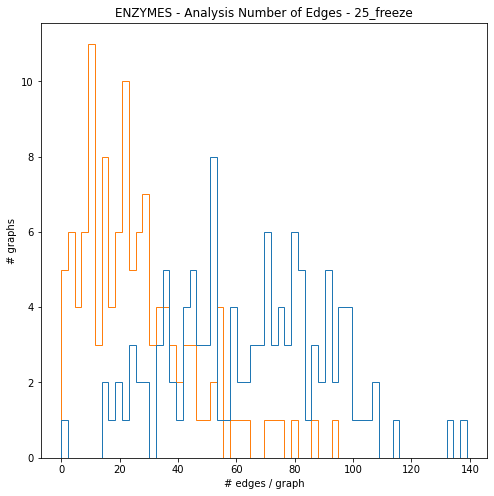

In [10]:
def plot_bar(stats, prop, title, xlabel='--'):

    n_plots = len(stats)
    fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(8, 8))
    vals = []
    for key, stat_lvl in stats.items():
        values = stat_lvl[prop]
        vals.append(values)

        

    ax.hist(vals,
            bins=len(vals[0])//2, # range(max(values)//2))
            histtype='step',
            # alpha=0.6,
           )

    ax.set(
        title=f'{title} - {key}',
        xlabel=xlabel,
        ylabel='# graphs'
    )
    # ax.autoscale(tight=True)
    # plt.xlim(-5, 400)
    # plt.ylim(0, 60)
    plt.show()

plot_bar(graph_stats,
         prop='n_edges',
         title=f'{dataset_name.upper()} - Analysis Number of Edges',
         xlabel='# edges / graph')

In [11]:
# plot_bar(graph_stats['mean_degrees'],
#          title=f'{dataset_name.upper()} - Analysis Mean Degrees',
#          xlabel='# mean degrees / graph')

In [12]:

# plot_bar(graph_stats['max_degrees'],
#          title=f'{dataset_name.upper()} - Analysis Max Degree',
#          xlabel='# max degrees / graph')

In [13]:
a = np.arange(10)
b = np.arange(4)

np.concatenate([a, b])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3])

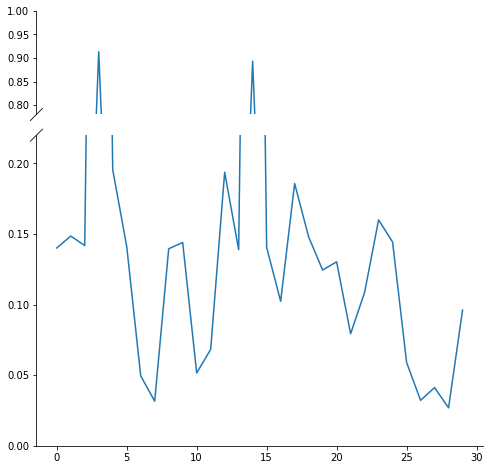

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig = plt.figure(figsize=(8, 8))
bax = brokenaxes(ylims=((0, .22), (.78, 1.)), hspace=0.1, height_ratios=[0.25, 0.75])


# plot the same data on both axes
bax.plot(pts)


# zoom-in / limit the view to different portions of the data
# ax.set_ylim  # outliers only
# ax2.set_ylim  # most of the data

# # hide the spines between ax and ax2
# ax.spines.bottom.set_visible(False)
# ax2.spines.top.set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.


plt.show()